# knee osteoarthritis classification


## import library

In [17]:
import pandas as pd
import numpy as np
import pickle 
import os 
import operator
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score,f1_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import CategoricalNB,GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings("ignore")

## Get data from google drive

In [2]:
# get data from google drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading data as a pandas dataframe
df = pd.read_pickle('/content/drive/MyDrive/datapkle/structure_dataset.pkl')

Value counts for each class:

1    188
0    104
Name: target, dtype: int64



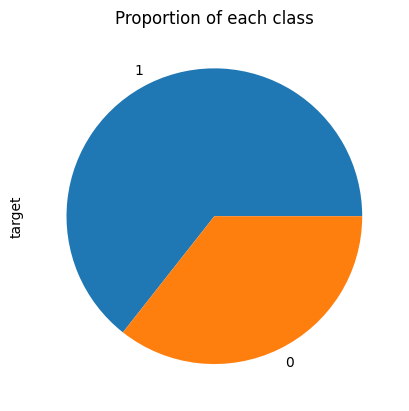

In [4]:
print(f"Value counts for each class:\n\n{df.target.value_counts()}\n")

# Display pie chart to visually check the proportion
df.target.value_counts().plot.pie(y='label', title='Proportion of each class')
plt.show()

In [5]:
df.dtypes

feature_one       float64
feature_two       float64
feature_three     float64
feature_four      float64
feature_five      float64
feature2_one      float64
feature2_two      float64
feature2_three    float64
feature2_four     float64
feature2_five     float64
feature3_one      float64
feature3_two      float64
feature3_three    float64
feature3_four     float64
feature3_five     float64
feature4_one      float64
feature4_two      float64
feature4_three    float64
feature4_four     float64
feature4_five     float64
feature5_one      float64
feature5_two      float64
feature5_three    float64
feature5_four     float64
feature5_five     float64
target              int64
dtype: object

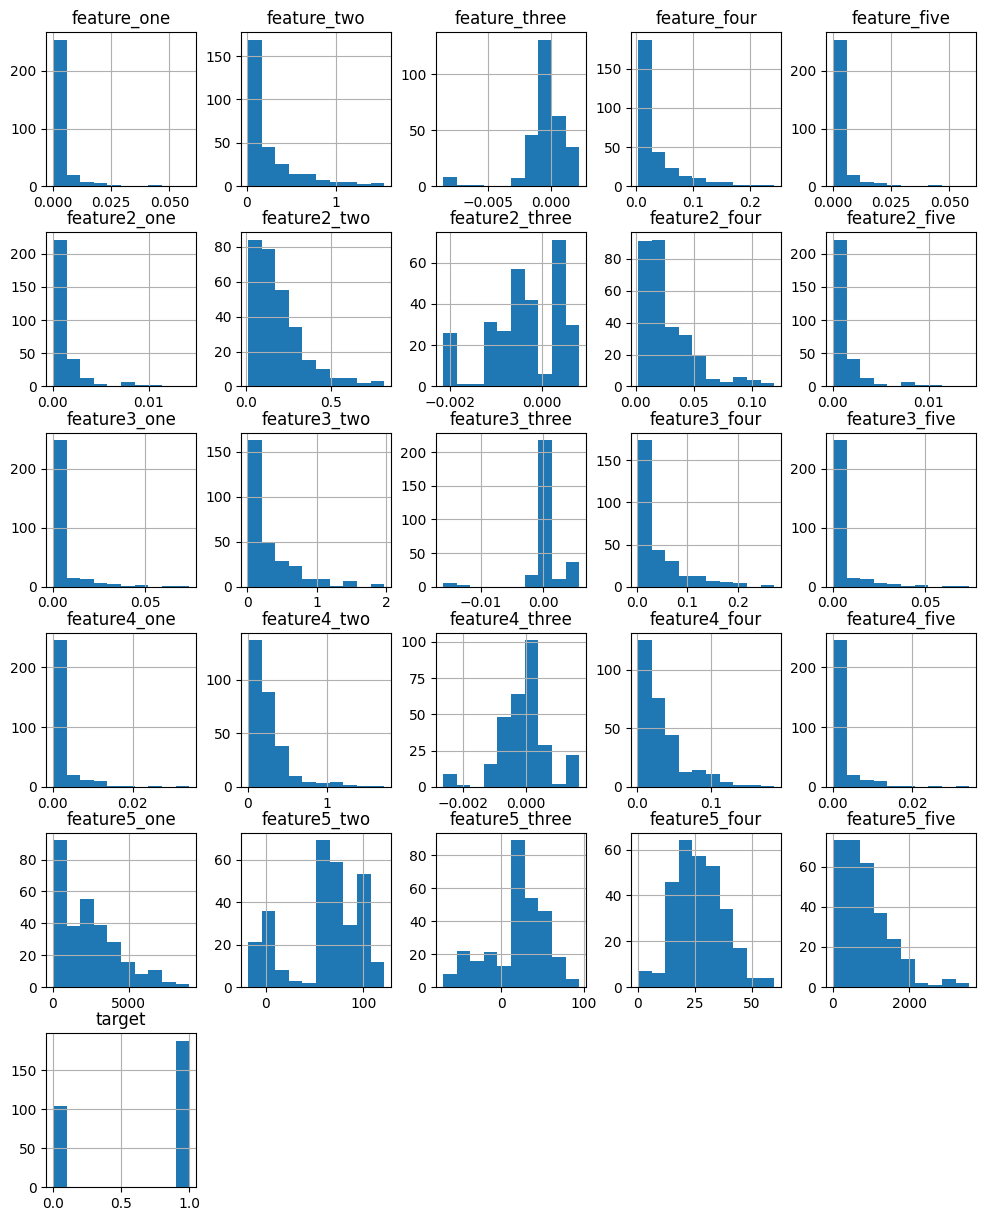

In [7]:
df.hist(figsize = (12, 15));

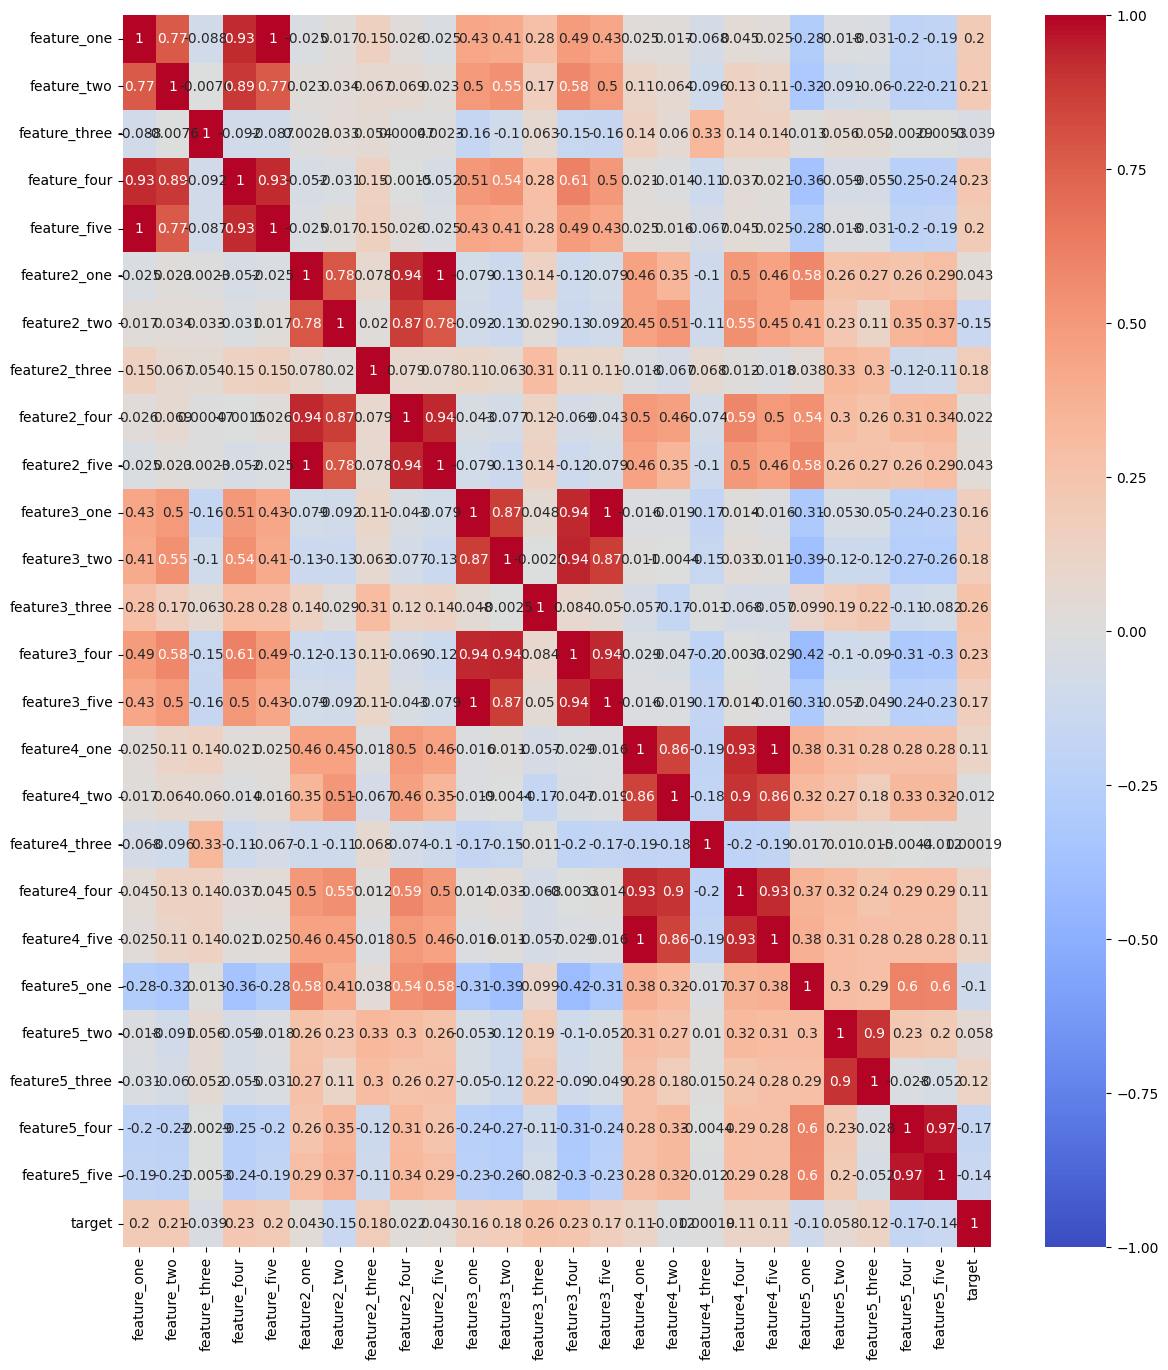

In [10]:
import seaborn as sns 
corr = df.corr()
plt.figure(figsize=(14,16))
sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm'); # greens

In [11]:
df1 = df.sample(frac=1)

In [12]:
df1 = df1.reset_index()
df1

,index,feature_one,feature_two,feature_three,feature_four,feature_five,feature2_one,feature2_two,feature2_three,feature2_four,...,feature4_two,feature4_three,feature4_four,feature4_five,feature5_one,feature5_two,feature5_three,feature5_four,feature5_five,target
0,85,0.000449,0.1132,0.000845,0.021168,0.000448,0.000014,0.0247,0.000787,0.003627,...,0.0165,0.000794,0.003594,0.000013,2400.390166,84.0,38.22702,30.647560,939.272963,1
1,3,0.005215,1.2337,-0.000117,0.072222,0.005216,0.000444,0.1282,-0.000634,0.021058,...,0.1072,0.000688,0.015046,0.000226,345.807568,1.8,-10.80764,15.134342,229.048295,1
2,92,0.003136,0.6382,-0.000360,0.056006,0.003137,0.002561,0.2572,-0.001862,0.050579,...,0.2730,0.001265,0.036109,0.001304,1005.555216,54.9,24.19344,20.501628,420.316740,0
3,114,0.007730,0.5122,-0.001279,0.087919,0.007730,0.000393,0.1305,0.000303,0.019825,...,0.0915,0.000101,0.017266,0.000298,284.785064,56.9,6.61288,15.527495,241.103103,1
4,33,0.000102,0.0510,-0.000495,0.010100,0.000102,0.000011,0.0142,0.000270,0.003336,...,0.0142,0.000292,0.003767,0.000014,1720.157482,86.9,30.49810,28.110166,790.181415,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,39,0.000144,0.0960,-0.001735,0.011857,0.000141,0.000010,0.0127,-0.000671,0.003129,...,0.0765,-0.000802,0.008029,0.000064,2312.590704,62.0,44.39608,18.483699,341.647114,0
288,56,0.000055,0.0502,-0.001731,0.007215,0.000052,0.001047,0.2730,-0.000611,0.032350,...,0.1215,-0.000743,0.017394,0.000303,2093.471888,94.5,32.17504,32.533834,1058.450379,0
289,148,0.000134,0.0952,-0.000423,0.011571,0.000134,0.000268,0.1050,-0.002119,0.016231,...,0.1980,-0.000328,0.031783,0.001010,2438.562578,4.8,-28.46002,40.359827,1628.915623,1
290,104,0.008201,0.5407,-0.001111,0.090559,0.008201,0.000115,0.0675,0.000248,0.010707,...,0.1777,0.000159,0.018559,0.000344,103.305806,40.2,4.33358,9.194716,84.542799,1


As we know the ML models can only work with numerical data so we want to encode our categorical columns into numerical ones 

In [13]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
# here I am using Stratified cross validation for evaluating the unbalanced data 
skf = StratifiedKFold(n_splits=15,shuffle=True)
skf.get_n_splits(X, y)

val_accuracy = []
val_fscore = []
classifiers=[
             LinearSVC(),
             ExtraTreesClassifier(),
             LogisticRegression(),
             SVC(),
            #  MultinomialNB(),
             BernoulliNB(),
             AdaBoostClassifier(),
             SGDClassifier(),
             DecisionTreeClassifier(),
             RandomForestClassifier(),
             KNeighborsClassifier(),
             xgb.XGBClassifier()
               ]
best = 0
best_classifier= 0
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
for classifier in classifiers:
  print('working now on : ',classifier.__class__.__name__)
  accuracy=0
  fscore=0
  skf = StratifiedKFold(n_splits=10)
  skf.get_n_splits(X_train, Y_train)
  for train_index, test_index in skf.split(X_train, Y_train):
     
     x_train, x_val = X_train.iloc[train_index], X_train.iloc[test_index]
     y_train, y_val = Y_train.iloc[train_index], Y_train.iloc[test_index]
     pipeline = Pipeline([
        ('clf', classifier),
      ])
     
     pipeline.fit(x_train, y_train)
     

     y_pred = pipeline.predict(x_val)
     accuracy+=accuracy_score(y_val,y_pred)
     fscore+=f1_score(y_val,y_pred,average='macro')
  if fscore>best:
    best = max(fscore,best)
    best_classifier= pipeline
  val_accuracy.append((classifier.__class__.__name__,accuracy/len(classifiers)))
  val_fscore.append((classifier.__class__.__name__,fscore/len(classifiers)))

working now on :  LinearSVC
working now on :  ExtraTreesClassifier
working now on :  LogisticRegression
working now on :  SVC
working now on :  BernoulliNB
working now on :  AdaBoostClassifier
working now on :  SGDClassifier
working now on :  DecisionTreeClassifier
working now on :  RandomForestClassifier
working now on :  KNeighborsClassifier
working now on :  XGBClassifier


The avarage scores of the classifiers on validation foldes:

In [14]:
print('{0:25}{1:10}           {2:10}'.format('algorithm', 'accuracy', 'F score'))
print('-------------------------------------------------------')
for i in range(len(classifiers)):
  print('{0:25}{1:10}{2:10.3f}'.format(val_accuracy[i][0], val_accuracy[i][1],val_fscore[i][1] ))

algorithm                accuracy             F score   
-------------------------------------------------------
LinearSVC                0.546772068511199     0.429
ExtraTreesClassifier     0.8934453227931488     0.892
LogisticRegression       0.6709486166007905     0.633
SVC                      0.5892621870882742     0.357
BernoulliNB              0.6161067193675889     0.558
AdaBoostClassifier       0.858695652173913     0.854
SGDClassifier            0.5624176548089592     0.390
DecisionTreeClassifier   0.8430500658761527     0.836
RandomForestClassifier   0.8736824769433464     0.869
KNeighborsClassifier     0.6088603425559947     0.549
XGBClassifier            0.8585309617918313     0.853


The accuracy of the trained model on test set :

In [15]:
Y_pred = best_classifier.predict(X_test)
print("accuracy = ",accuracy_score(Y_test,Y_pred))
print("F score = ",f1_score(Y_test,Y_pred,average='macro'))

accuracy =  0.9491525423728814
F score =  0.943934114665822


It looks that Extratreesclassifier (Extratreesclassifier) classifier has the best results according to (F score) and accuracy metrics above the other classifiers in our validation but still it's not good score but this's our baseline !


In [18]:
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.93      1.00      0.96        37

    accuracy                           0.95        59
   macro avg       0.96      0.93      0.94        59
weighted avg       0.95      0.95      0.95        59



In [19]:
clf = ExtraTreesClassifier()
clf.fit(X_train,Y_train)

ExtraTreesClassifier()

In [20]:
ypre = clf.predict(X_test)
accuracy_score(ypre,Y_test)

0.9491525423728814

In [21]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93        22
           1       0.93      1.00      0.96        37

    accuracy                           0.95        59
   macro avg       0.96      0.93      0.94        59
weighted avg       0.95      0.95      0.95        59




let's optimize the SGD classifier with grid search :

In [24]:

# instantiate model
etr = ExtraTreesClassifier(n_estimators = 100,
                            max_depth = 12,
                            criterion = 'gini',
                            bootstrap = False,
                            class_weight = None,
                            warm_start = True,
                            max_leaf_nodes = 20,
                            random_state = 0)

etr.fit(X_train, Y_train) # train on train data
etr_score = round(etr.score(X_test, Y_test), 5) # validate on validation data

print('ExtraTreesClassifier score: ', etr_score)


ExtraTreesClassifier score:  0.94915


In [28]:
import optuna
def objective(trial):

    ### define params grid to search maximum accuracy
    n_estimators = trial.suggest_int('n_estimators', 50, 120)
    max_depth = trial.suggest_int('max_depth', 10, 16)
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 15, 25)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    ### modeling with suggested params
    model = ExtraTreesClassifier(n_estimators = n_estimators,
                                 max_depth = max_depth,
                                 max_leaf_nodes = max_leaf_nodes,
                                 criterion = criterion,
                                 random_state = 0) # do not tune the seed

    ### cross validation score
    # score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3)
    # etr_score = score.mean()

    ### fit
    model.fit(X_train, Y_train) # train on train data
    accuracy = round(model.score(X_test, Y_test), 5) # validate on validation data

    return accuracy
    
study = optuna.create_study(direction='maximize') # maximize accuracy
study.optimize(objective, n_trials=30)

[I 2023-04-19 00:43:58,282] A new study created in memory with name: no-name-189f21be-0763-41cf-8df3-d73f7961331b
[I 2023-04-19 00:43:58,910] Trial 0 finished with value: 0.94915 and parameters: {'n_estimators': 106, 'max_depth': 16, 'max_leaf_nodes': 15, 'criterion': 'entropy'}. Best is trial 0 with value: 0.94915.
[I 2023-04-19 00:43:59,544] Trial 1 finished with value: 0.94915 and parameters: {'n_estimators': 100, 'max_depth': 15, 'max_leaf_nodes': 25, 'criterion': 'entropy'}. Best is trial 0 with value: 0.94915.
[I 2023-04-19 00:43:59,927] Trial 2 finished with value: 0.94915 and parameters: {'n_estimators': 66, 'max_depth': 16, 'max_leaf_nodes': 18, 'criterion': 'entropy'}. Best is trial 0 with value: 0.94915.
[I 2023-04-19 00:44:00,583] Trial 3 finished with value: 0.94915 and parameters: {'n_estimators': 60, 'max_depth': 13, 'max_leaf_nodes': 16, 'criterion': 'gini'}. Best is trial 0 with value: 0.94915.
[I 2023-04-19 00:44:01,670] Trial 4 finished with value: 0.94915 and parame

In [29]:
# best params
study.best_trial.params

{'n_estimators': 106,
 'max_depth': 16,
 'max_leaf_nodes': 15,
 'criterion': 'entropy'}

In [30]:
# best score (accuracy)
study.best_value

0.94915

In [31]:
# param importances dictionary
optuna.importance.get_param_importances(study)

OrderedDict([('n_estimators', 0.3834731939318997),
             ('criterion', 0.2257391178969266),
             ('max_depth', 0.21238018587752866),
             ('max_leaf_nodes', 0.17840750229364505)])

In [32]:
## plot param importances
optuna.visualization.plot_param_importances(study)

In [33]:
# plot optimization history
optuna.visualization.plot_optimization_history(study)

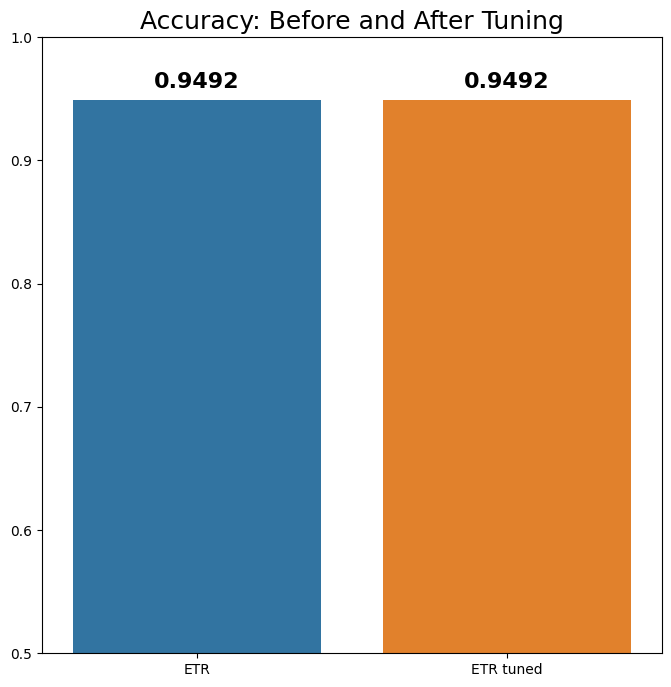

In [34]:
names = np.array(['ETR', 'ETR tuned'])
values = np.array([etr_score, study.best_value])

plt.figure(figsize=(8,8))
plt.title("Accuracy: Before and After Tuning", fontsize=18)
plt.ylim(0.5, 1)
bar1 = sns.barplot(x = names, y = values);

for p in bar1.patches:
  _x = p.get_x() + p.get_width() / 2
  _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
  value = '{:.4f}'.format(p.get_height())
  plt.text(_x, _y, value, ha="center", fontsize=16, fontweight = 'bold') 

In [35]:
pickle.dump(clf,open('/content/drive/MyDrive/datapkle/EMG4500.pkl','wb'))

In [36]:
# load model from pickle 
model = pickle.load(open('/content/drive/MyDrive/datapkle/EMG4500.pkl','rb'))

In [45]:
# get one sample to test 
tt = df1.iloc[0]
X = tt[:-1]
y = tt[-1]
Y_pred = model.predict([X])

In [48]:
Y_pred , y

(array([1]), 1.0)